# sedproxy documentation example

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
import os

# Add the path to your sedproxy directory
sys.path.insert(0, '/Users/tanaya/Documents/GitHub/sedproxy_python')

# Import directly
from clim_to_proxy_clim2 import clim_to_proxy_clim

from plot_pfms import plot_pfms
from bioturbation_weights import bioturbation_weights
from proxy_conversion import proxy_conversion

In [3]:
N41_t21k_climate_df = pd.read_csv('./data/N41_t21k_climate.csv')
N41_proxy_df = pd.read_csv('./data/N41_proxy.csv')
N41_proxy_seasonality_df = pd.read_csv('./data/N41_G_ruber_seasonality.csv')

In [4]:
N41_proxy_seasonality_df

,x
0,0.022579
1,0.025321
2,0.024716
3,0.016995
4,0.014437
5,0.014700
6,0.015867
7,0.015905
8,0.015889
9,0.015768


In [5]:
N41_proxy_df['Sed.acc.rate.cm.ka']

0      36.79
1      36.75
2      36.77
3      36.77
4      36.70
       ...  
211    30.15
212    30.26
213    30.33
214    30.38
215    30.47
Name: Sed.acc.rate.cm.ka, Length: 216, dtype: float64

In [6]:
# 1. Recreate the R preprocessing exactly
clim_in = N41_t21k_climate_df - 273.15
clim_in = clim_in.iloc[::-1]  # Reverse like R does [nrow:1]

# 2. Create time index starting at -39 going FORWARD (not backward)
rows = clim_in.shape[0]
time_index = np.arange(-39, -39 + rows)  # -39, -38, -37, ..., up to positive values
clim_in.index = time_index

# 3. Use Published.age values directly (no conversion needed)
timepoints_direct = N41_proxy_df['Published.age'].values.astype(int)

# 4. Verify the mapping works
print("Climate time range:", clim_in.index.min(), "to", clim_in.index.max())
print("Timepoint range:", timepoints_direct.min(), "to", timepoints_direct.max())
print("Sample timepoints in climate?", timepoints_direct[:5])
print("Do they exist?", [tp in clim_in.index for tp in timepoints_direct[:5]])

Climate time range: -39 to 22000
Timepoint range: 4334 to 20830
Sample timepoints in climate? [4334 4527 4575 4720 4913]
Do they exist? [True, True, True, True, True]


In [7]:
# Load stages key
stages_key_df = pd.read_csv("./data/stages_key.csv")

# Normalize columns and stage names
stages_key_df.columns = [c.replace(".", "_") for c in stages_key_df.columns]
stages_key_df["stage"] = stages_key_df["stage"].str.replace(".", "_", regex=False)


In [8]:
habitat_weights = N41_proxy_seasonality_df.values.flatten()
# or
habitat_weights = N41_proxy_seasonality_df['x'].values

print("Shape after flattening:", habitat_weights.shape)  # Should be (12,)

Shape after flattening: (12,)


In [9]:
PFM = clim_to_proxy_clim(clim_signal=clim_in.values,
                         timepoints= timepoints_direct,
                         habitat_weights= habitat_weights,
                         calibration_type= 'identity',
                         sed_acc_rate= N41_proxy_df['Sed.acc.rate.cm.ka'].values,
                         sigma_meas=0.23,
                         sigma_ind=2,
                         plot_sig_res=1,
                         n_samples = 30,
                         stages_key=stages_key_df)


Timepoint 4334 (i=0):
  tp_adjusted: 4334
  bioturb_window range: -285 to 813
  weights sum: 0.9999999999999999
  weights non-zero: 1099
  proxy_window shape: (1099, 12)
  proxy_window mean: 27.923769270596395
Timepoint 4334 (i=0):
  current_sed_acc: 36.79
  bio_ts: 271
  layer_yrs: 28
  bioturb_window range: -285 to 813
  tp_adjusted: 4334
  weights sum: 0.9999999999999999
  weights shape: (1099,)
  proxy_window shape: (1099, 12)
  window_indices range: 4049 to 5147

Timepoint 4527 (i=1):
  tp_adjusted: 4527
  bioturb_window range: -286 to 816
  weights sum: 1.0
  weights non-zero: 1103
  proxy_window shape: (1103, 12)
  proxy_window mean: 27.90642764061809
Timepoint 4527 (i=1):
  current_sed_acc: 36.75
  bio_ts: 272
  layer_yrs: 28
  bioturb_window range: -286 to 816
  tp_adjusted: 4527
  weights sum: 1.0
  weights shape: (1103,)
  proxy_window shape: (1103, 12)
  window_indices range: 4241 to 5343

Timepoint 4575 (i=2):
  tp_adjusted: 4575
  bioturb_window range: -285 to 813
  weig

Mapping result:


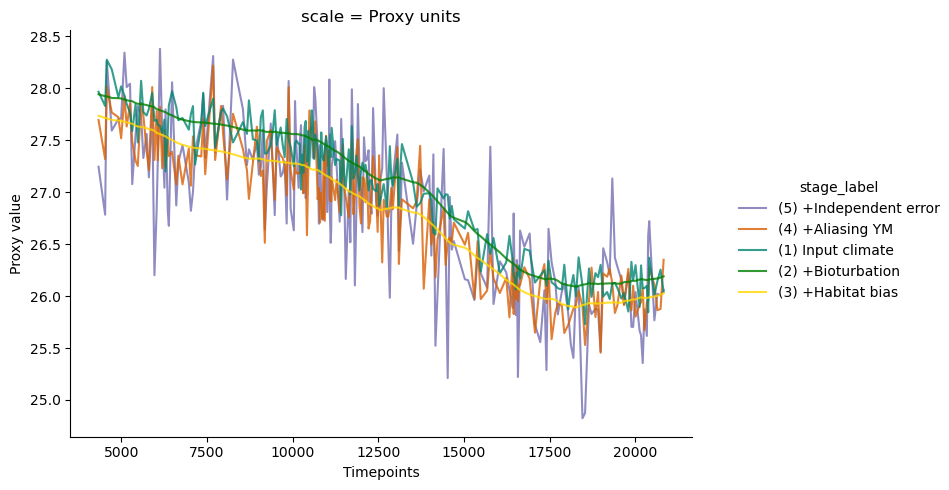

In [10]:
plot_pfms(PFM, max_replicates= 1, stages_key=stages_key_df)